In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
## 폰트 깨짐 문제 해결##
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 9, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기

Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import pandas as pd

fine_dust_df_origin = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/seoul_air.csv')
rain_fall_df_origin = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/sum_rain_fall.csv')

fine_dust_df = fine_dust_df_origin.copy()
rain_fall_df = rain_fall_df_origin.copy()


In [ ]:
rain_fall_df

,Gu,Date,DailyRain
0,강남구,2023-01-01,0.0
1,강남구,2023-01-02,0.0
2,강남구,2023-01-03,0.0
3,강남구,2023-01-04,0.0
4,강남구,2023-01-05,0.0
...,...,...,...
4475,중랑구,2023-06-26,65.0
4476,중랑구,2023-06-27,2.0
4477,중랑구,2023-06-28,0.0
4478,중랑구,2023-06-29,133.5


In [ ]:
# '평균'이라고 쓰여진 행 삭제
fine_dust_df.drop(fine_dust_df[fine_dust_df['Gu'] == '평균'].index, inplace=True)

In [ ]:
# 일별 유동인구 증가량 계산
fine_dust_df['증감률'] = 0  # 증감률 컬럼 초기화
for i in range(1, len(fine_dust_df)):
  prev_visitor = fine_dust_df.iloc[i-1, fine_dust_df.columns.get_loc('PM10')]
  curr_visitor = fine_dust_df.iloc[i, fine_dust_df.columns.get_loc('PM10')]
  rate = (curr_visitor - prev_visitor) / prev_visitor
  if rate >= 50 :
    fine_dust_df.iloc[i, fine_dust_df.columns.get_loc('증감률')] = 50
  else :
    fine_dust_df.iloc[i, fine_dust_df.columns.get_loc('증감률')] = rate

# 결과 출력
fine_dust_df.head()

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2,증감률
0,2023-01-01,중랑구,52.0,39.0,0.021,0.030,0.7,0.003,0.000000
1,2023-01-01,중구,54.0,46.0,0.026,0.023,0.6,0.004,0.038462
2,2023-01-01,종로구,53.0,42.0,0.025,0.022,0.7,0.004,-0.018519
3,2023-01-01,은평구,55.0,37.0,0.023,0.021,0.8,0.004,0.037736
4,2023-01-01,용산구,50.0,37.0,0.024,0.019,0.6,0.004,-0.090909


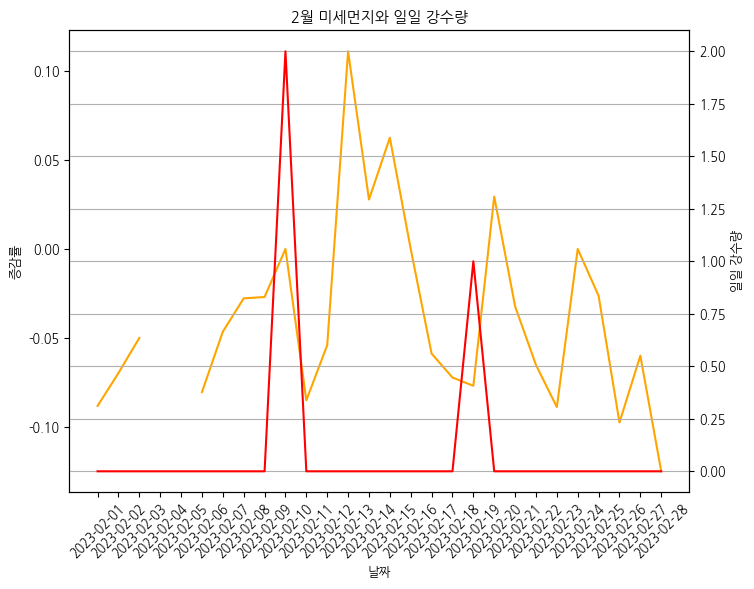

In [50]:
import matplotlib.pyplot as plt

# 데이터 필터링
fine_dust_filtered = fine_dust_df[(fine_dust_df['Gu'] == '강남구') & (fine_dust_df['Date'] >= '2023-02-01') & (fine_dust_df['Date'] <= '2023-02-28')]
rain_fall_filtered = rain_fall_df[(rain_fall_df['Gu'] == '강남구') & (rain_fall_df['Date'] >= '2023-02-01') & (rain_fall_df['Date'] <= '2023-02-28')]

# 서브 플롯 생성
fig, ax1 = plt.subplots(figsize=(8, 6))

# 45도 회전
plt.xticks(rotation=45)

# 첫 번째 서브 플롯 (방문자수)
ax1.plot(fine_dust_filtered['Date'], fine_dust_filtered['증감률'], color='orange')
ax1.set_ylabel('증감률')
ax1.set_xticks(fine_dust_filtered['Date'])
ax1.set_xticklabels(fine_dust_filtered['Date'], rotation=45)

# 두 번째 y축 생성
ax2 = ax1.twinx()

# 두 번째 서브 플롯 (일일 강수량)
ax2.plot(rain_fall_filtered['Date'], rain_fall_filtered['DailyRain'], color='red')
ax2.set_ylabel('일일 강수량')

# 축 레이블 설정
ax1.set_xlabel('날짜')

# 타이틀 추가
plt.title('2월 미세먼지와 일일 강수량')

# 그래프 표시
plt.grid()
plt.show()


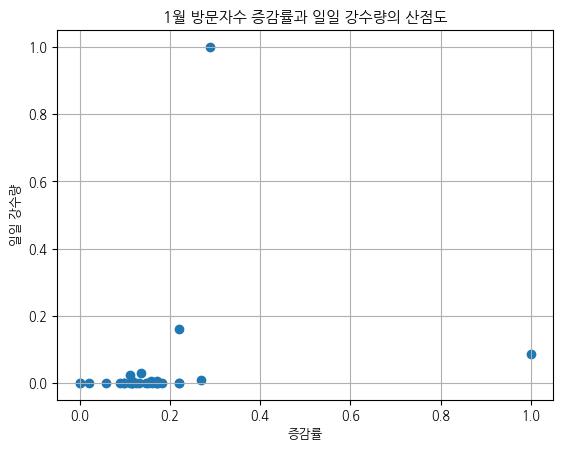

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 최소-최대 스케일링
scaler = MinMaxScaler()
foot_traffic_scaled = scaler.fit_transform(fine_dust_filtered[['증감률']])
rain_fall_scaled = scaler.fit_transform(rain_fall_filtered[['DailyRain']])


# 산점도 그리기
plt.scatter(foot_traffic_scaled, rain_fall_scaled)
plt.xlabel('증감률')
plt.ylabel('일일 강수량')
plt.title('1월 방문자수 증감률과 일일 강수량의 산점도')

# 그래프 표시
plt.grid()
plt.show()